In [3]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
def plot_cluster(data, labels, title):
  colors = ['red','green','purple','black']
  plt.figure(figsize=(8,4))
  for i,c,l in zip(range(-1,3), colors, ['Noise','Setosa','Versicolor','Virginica']):
    if i == -1:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c = colors[i], label = 1, alpha = 0.5, s = 50, marker = 'x')
    else:
      plt.scatter(data[labels== i, 0], data[labels == i, 3], c = colors[i], label = 1, alpha = 0.5, s = 50)
  plt.legend()
  plt.title(title)
  plt.xlabel("Comprimeto da Sepala")
  plt.ylabel("Largura da Petala")
  plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


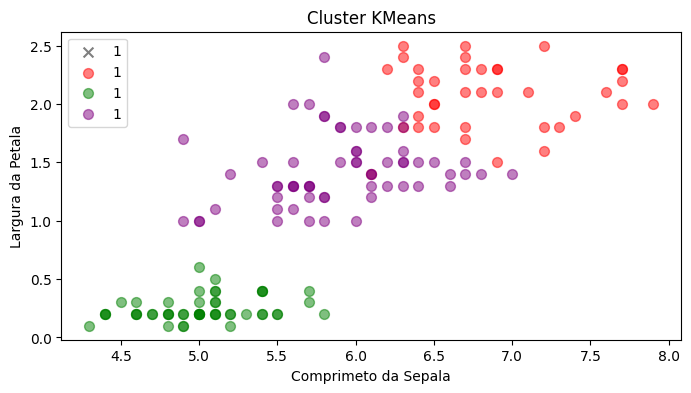

In [15]:
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(iris.data)
print(kmeans.labels_)
resultados = confusion_matrix(iris.target, kmeans.labels_)
print(resultados)
plot_cluster(iris.data, kmeans.labels_, "Cluster KMeans")

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


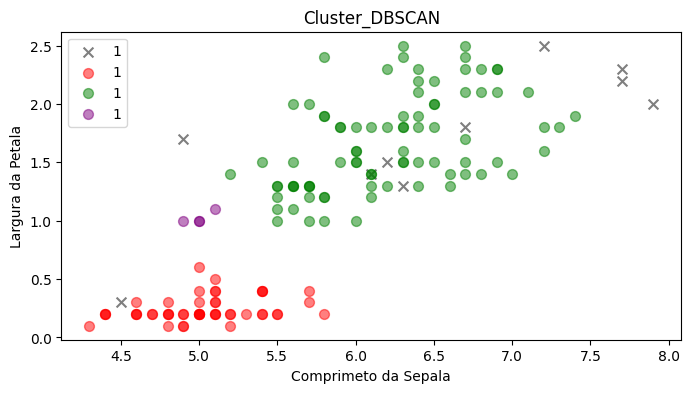

In [18]:
dbscan_obj = DBSCAN(eps = 0.5, min_samples = 3)
dbscan_labels = dbscan_obj.fit_predict(iris.data)
print(dbscan_labels)
plot_cluster(iris.data, dbscan_labels, "Cluster_DBSCAN")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


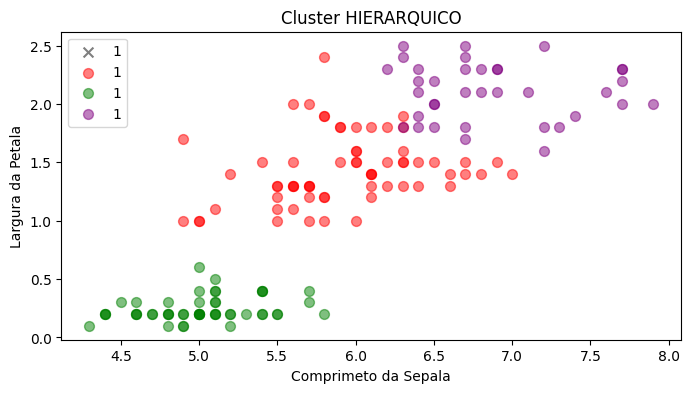

In [17]:
agglo_model_obj = AgglomerativeClustering(n_clusters = 3)
agglo_labels = agglo_model_obj.fit_predict(iris.data)
print(agglo_labels)
resultados = confusion_matrix(iris.target, agglo_labels)
print(resultados)
plot_cluster(iris.data, agglo_labels, "Cluster HIERARQUICO")

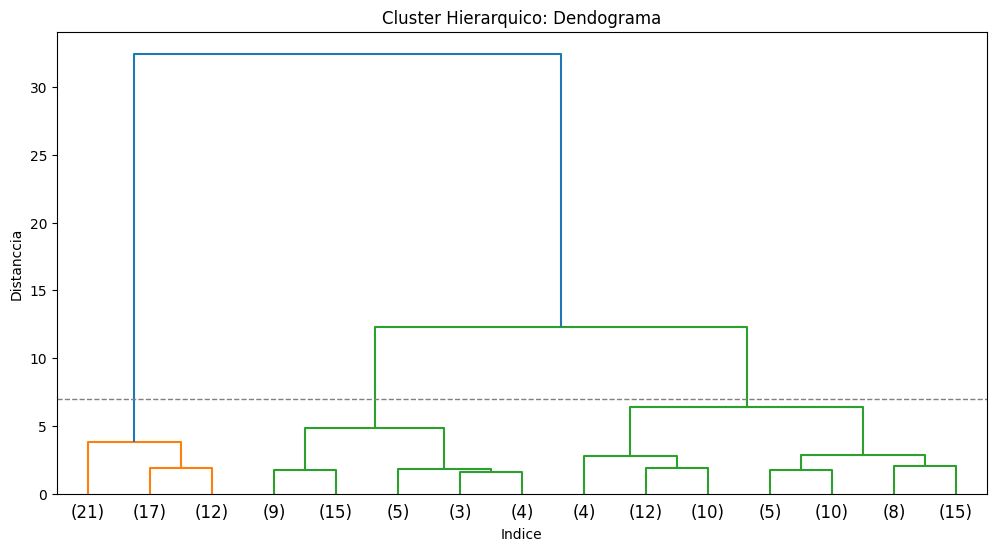

In [19]:
plt.figure(figsize=(12,6))
plt.title("Cluster Hierarquico: Dendograma")
plt.xlabel("Indice")
plt.ylabel("Distanccia")
linkage_matrix = linkage(iris.data, method = 'ward')
dendrogram(linkage_matrix, truncate_mode = 'lastp', p = 15)
plt.axhline(y=7, c= 'gray', lw = 1, linestyle = 'dashed')
plt.show()##dendrograma --> uma forma de representar clustersa hierarquicos
          ##cada cor === um cluster